In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect= True)
# reflect the tables
Base.classes.keys()


['measurement', 'station']

In [6]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
lastyear= dt.date(2017,8,23)- dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last12months=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > lastyear).\
order_by(Measurement.date).all()

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# set index to "Date" column, sort values by "Date"
last_year_prcp= pd.DataFrame(last12months)
last_year_prcp.columns=["Date", "PRCP"]
last_year_prcp.set_index("Date")
last_year_prcp.sort_values(by=["Date"])

,Date,PRCP
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00


NameError: name 'ax' is not defined

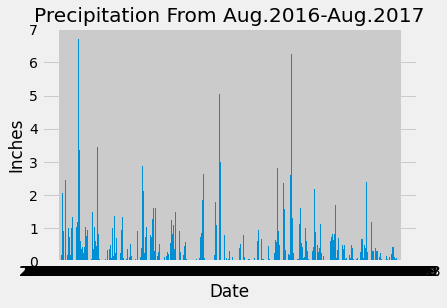

In [38]:
# Use Pandas Plotting with Matplotlib to plot the data
#x_axis= last_year_prcp["Date"]
#y_axis= last_year_prcp["PRCP"]

#plt.bar(x_axis, y_axis)
#plt.title("Precipitation From Aug.2016-Aug.2017")
#plt.xlabel("Date")
#plt.ylabel("Inches")
#ax.set_xticks([10])
#plt.show()


fig,ax = plt.subplots()
ypos=(Measurement.)
ax.set_title("Precipitation From Aug.2016-Aug.2017")
ax.bar()
ax.set_ylabel("Inches")
ax.set_xlabel("Date")
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_prcp["PRCP"].describe()


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
total_stations=session.query(Station.station).count()
total_stations

9

In [36]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_counts= session.query(Measurement.station, func.count()).\
    group_by(Measurement.station).all()
for station, count in station_counts:
     print(station, count)

USC00511918 1979
USC00513117 2709
USC00514830 2202
USC00516128 2612
USC00517948 1372
USC00518838 511
USC00519281 2772
USC00519397 2724
USC00519523 2669


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()